In [2]:
import ultraplot as uplt
import matplotlib as plt
import numpy as np
import pandas as pd

In [3]:
def combine_sites(method_name):
    allegheny_count = 198
    mt_pleasant_count = 196
    arnot_forest_count = 195
    turkey_point_count = 200

    allegheny = pd.read_csv(f'./Data/ROC/ROC_Allegheny_{method_name}_2021.csv')
    mt_pleasant = pd.read_csv(f'./Data/ROC/ROC_Mt_Pleasant_{method_name}_2021.csv')
    arnot_forest = pd.read_csv(f'./Data/ROC/ROC_Arnot_Forest_{method_name}_2022.csv')
    turkey_point = pd.read_csv(f'./Data/ROC/ROC_Turkey_Point_{method_name}_2021.csv')
    combined = ((allegheny*allegheny_count + mt_pleasant*mt_pleasant_count
                           + arnot_forest*arnot_forest_count + turkey_point*turkey_point_count)
                          /(allegheny_count + mt_pleasant_count + arnot_forest_count + turkey_point_count))
    
    return combined, allegheny, mt_pleasant, arnot_forest, turkey_point

In [4]:
sentinel2_unscaled, alle_s2_unscaled, mtp_s2_unscaled, af_s2_unscaled, tp_s2_unscaled = combine_sites('Sentinel2_unscaled')
sentinel2, alle_s2, mtp_s2, af_s2, tp_s2 = combine_sites('Sentinel2')
landsat_unscaled, alle_ls_unscaled, mtp_ls_unscaled, af_ls_unscaled, tp_ls_unscaled = combine_sites('Landsat_unscaled')
landsat, alle_ls, mtp_ls, af_ls, tp_ls = combine_sites('Landsat')
modis_unscaled, alle_modis_unscaled, mtp_modis_unscaled, af_modis_unscaled, tp_modis_unscaled = combine_sites('MODIS_unscaled')
modis, alle_modis, mtp_modis, af_modis, tp_modis = combine_sites('MODIS')
harmonic_all_year, alle_harmonic_all_year, mtp_harmonic_all_year, af_harmonic_all_year, tp_harmonic_all_year = combine_sites('Sentinel2_harmonic_all_year')
harmonic_summer, alle_harmonic_summer, mtp_harmonic_summer, af_harmonic_summer, tp_harmonic_summer = combine_sites('Sentinel2_harmonic_summer')
harmonic_gs, alle_harmonic_gs, mtp_harmonic_gs, af_harmonic_gs, tp_harmonic_gs = combine_sites('Sentinel2_harmonic_growing_season')
means, alle_means, mtp_means, af_means, tp_means = combine_sites('Sentinel2_means')

In [5]:
def create_multifactor_legend(fig, ax, labels_props, legend_kw):
    # labels_props is a dictionary in the form of
    # {<label> : {<property> : <value>}, ...}
    for label in labels_props:
        # Create empty artists to record in legend
        ax.plot([], [], label=label, **labels_props[label])
    ax.legend(**legend_kw)

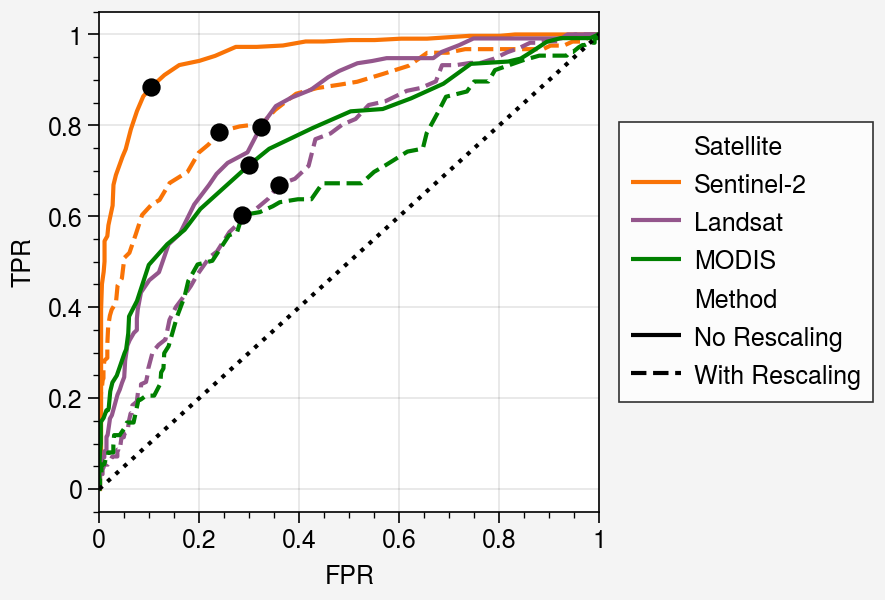

In [6]:
fig, ax = uplt.subplots()

# Define plotting properties
props = {'Satellite'      : {'linestyle' : 'None'},
         'Sentinel-2'     : {'color' : 'orange'},
         'Landsat'        : {'color' : 'purple'},
         'MODIS'          : {'color' : 'green'},
         'Method'         : {'linestyle' : 'None'},
         'No Rescaling'   : {'color' : 'black',
                             'linestyle' : 'solid'},
         'With Rescaling' : {'color' : 'black',
                             'linestyle' : 'dashed'}}

# Sentinel-2 unscaled
ax.plot(sentinel2_unscaled['FPR'], sentinel2_unscaled['TPR'], label='', color='orange')

# Sentinel-2
ax.plot(sentinel2['FPR'], sentinel2['TPR'], label='', color='orange', linestyle='dashed')

# Landsat unscaled
ax.plot(landsat_unscaled['FPR'], landsat_unscaled['TPR'], label='', color='purple')

# Landsat
ax.plot(landsat['FPR'], landsat['TPR'], label='', color='purple', linestyle='dashed')

# MODIS unscaled
ax.plot(modis_unscaled['FPR'], modis_unscaled['TPR'], label='', color='green')

# MODIS
ax.plot(modis['FPR'], modis['TPR'], label='', color='green', linestyle='dashed')

# Optimal Points
TPRs = []
FPRs = []
for method in [sentinel2_unscaled, sentinel2, landsat_unscaled, landsat, modis_unscaled, modis]:
    index = np.argmin(np.sqrt((1 - method['TPR'])**2 + method['FPR']**2))
    TPRs.append(method['TPR'][index])
    FPRs.append(method['FPR'][index])
ax.scatter(FPRs, TPRs, c='black', zorder=10)

# # Zero Points
# TPRs = []
# FPRs = []
# for method in [sentinel2_unscaled, sentinel2, landsat_unscaled, landsat, modis_unscaled, modis]:
#     mask = method['threshold'] == 0
#     TPRs.append(method['TPR'][mask])
#     FPRs.append(method['FPR'][mask])
# ax.scatter(FPRs, TPRs, c='gray', zorder=10)

ax.plot([0, 1], [0, 1], color='black', linestyle='dotted')
ax.format(xlim=[0, 1])
#ax.legend([m1, m2, m3, m4, m5, m6], ncols=1, loc='r')
             
create_multifactor_legend(fig, ax, props, {'ncols':1, 'loc':'r'})

#fig.savefig('./Figures/ROC/Combined_all_methods_ROC.svg')

## Testing out 2nd and 3rd panels

In [7]:
study_regions = pd.read_csv('./Data/ROC/study_site_defol_counts.csv')

<BarContainer object of 4 artists>

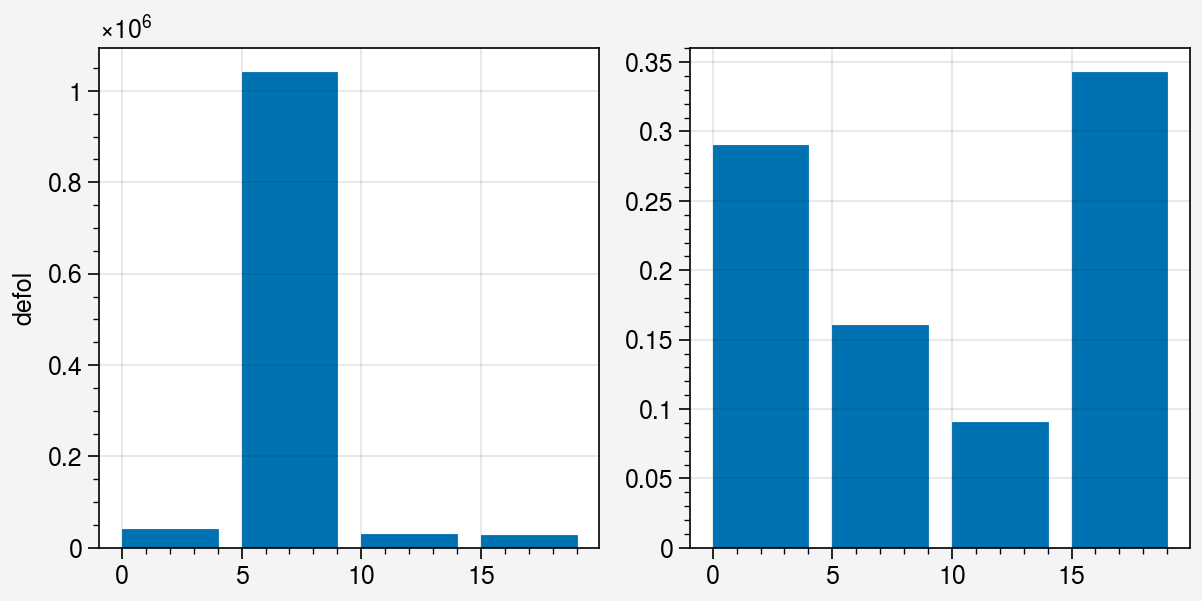

In [8]:
fig, axes = uplt.subplots(ncols=2, sharey=False)

data = study_regions[study_regions['year'] == 2021]

axes[0].bar(data['defol'])
axes[1].bar(data['defol']/data['forest'])

<BarContainer object of 5 artists>

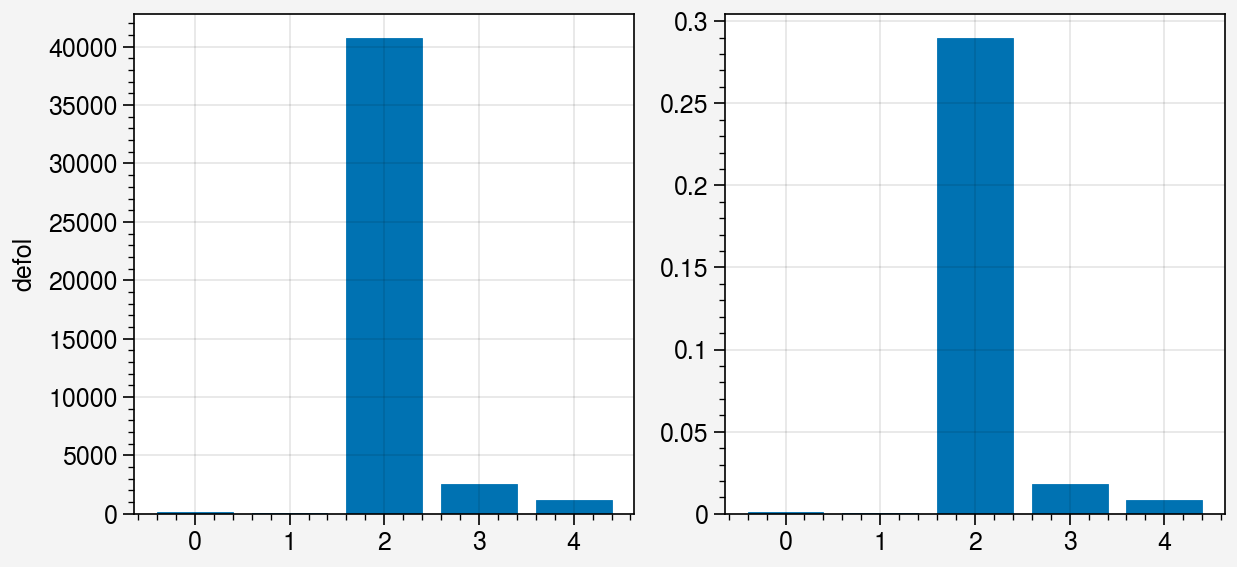

In [9]:
fig, axes = uplt.subplots(ncols=2, sharey=False)

data = study_regions[study_regions['site_name'] == 'mt_pleasant']

axes[0].bar(data['defol'])
axes[1].bar(data['defol']/data['forest'])

## Combined figure

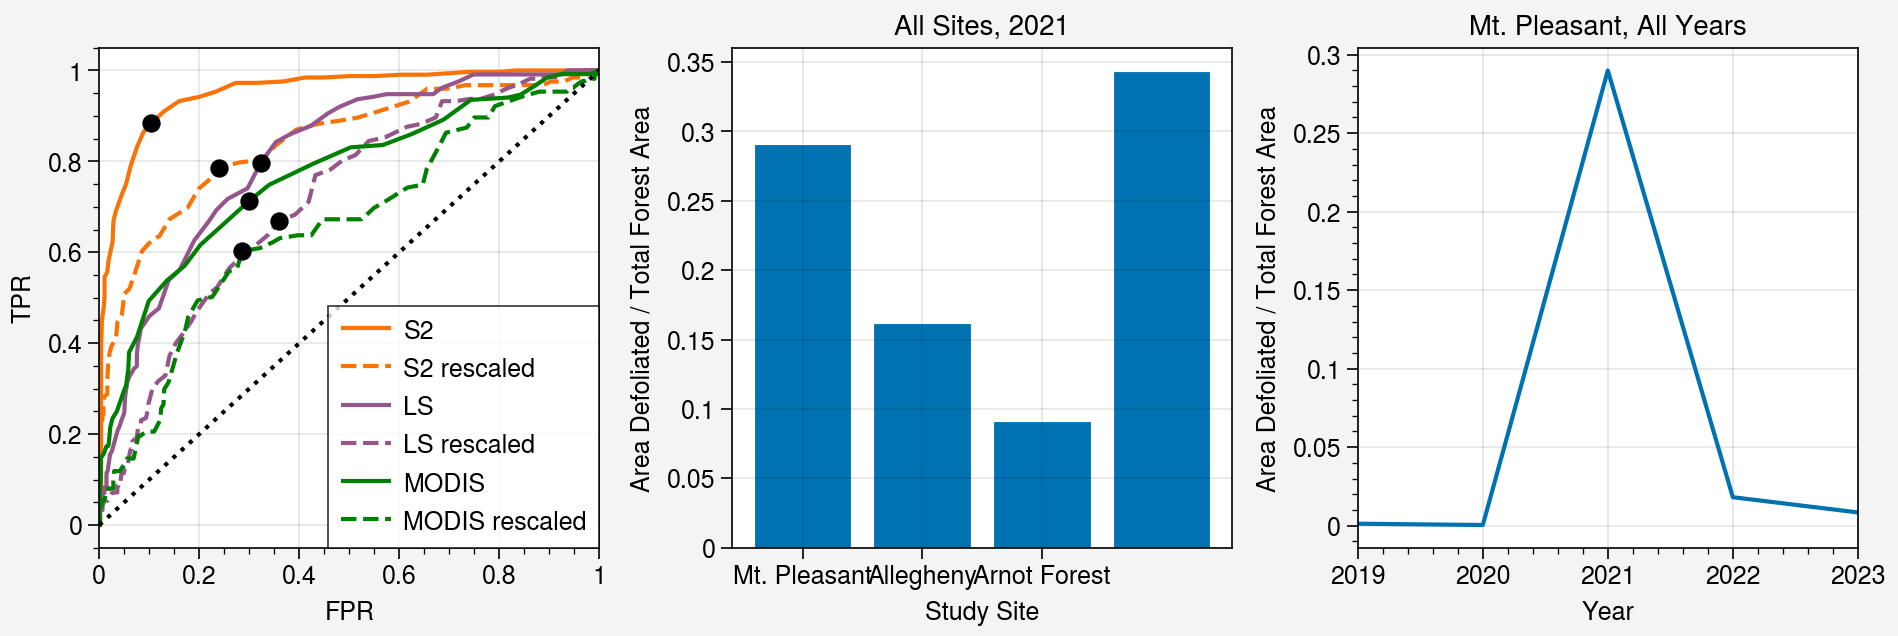

In [10]:
fig, axes = uplt.subplots(ncols=3, share=False)

# Sentinel-2 unscaled
axes[0].plot(sentinel2_unscaled['FPR'], sentinel2_unscaled['TPR'], label='S2', color='orange')

# Sentinel-2
axes[0].plot(sentinel2['FPR'], sentinel2['TPR'], label='S2 rescaled', color='orange', linestyle='dashed')

# Landsat unscaled
axes[0].plot(landsat_unscaled['FPR'], landsat_unscaled['TPR'], label='LS', color='purple')

# Landsat
axes[0].plot(landsat['FPR'], landsat['TPR'], label='LS rescaled', color='purple', linestyle='dashed')

# MODIS unscaled
axes[0].plot(modis_unscaled['FPR'], modis_unscaled['TPR'], label='MODIS', color='green')

# MODIS
axes[0].plot(modis['FPR'], modis['TPR'], label='MODIS rescaled', color='green', linestyle='dashed')

# Optimal Points
TPRs = []
FPRs = []
for method in [sentinel2_unscaled, sentinel2, landsat_unscaled, landsat, modis_unscaled, modis]:
    index = np.argmin(np.sqrt((1 - method['TPR'])**2 + method['FPR']**2))
    TPRs.append(method['TPR'][index])
    FPRs.append(method['FPR'][index])
axes[0].scatter(FPRs, TPRs, c='black', zorder=10)

axes[0].plot([0, 1], [0, 1], color='black', linestyle='dotted')
axes[0].format(xlim=[0, 1])
#ax.legend([m1, m2, m3, m4, m5, m6], ncols=1, loc='r')

axes[0].legend(loc='lr', ncols=1)



## Second plot
data = study_regions[study_regions['year'] == 2021]
axes[1].bar(data['defol']/data['forest'])
axes[1].format(ylabel='Area Defoliated / Total Forest Area', xlabel='Study Site', title='All Sites, 2021',
               xlocator=[2, 7, 12], xminorlocator=0.5, ytickminor=False, xticklabels=['Mt. Pleasant', 'Allegheny', 'Arnot Forest'])


## Third plot
data = study_regions[study_regions['site_name'] == 'mt_pleasant']
axes[2].plot(data['year'], data['defol']/data['forest'])
axes[2].format(ylabel='Area Defoliated / Total Forest Area', xlabel='Year', title='Mt. Pleasant, All Years')
fig.savefig('./Figures/ROC/ROC_cross_site_comparison_V1.svg')

# Cross-method comparison

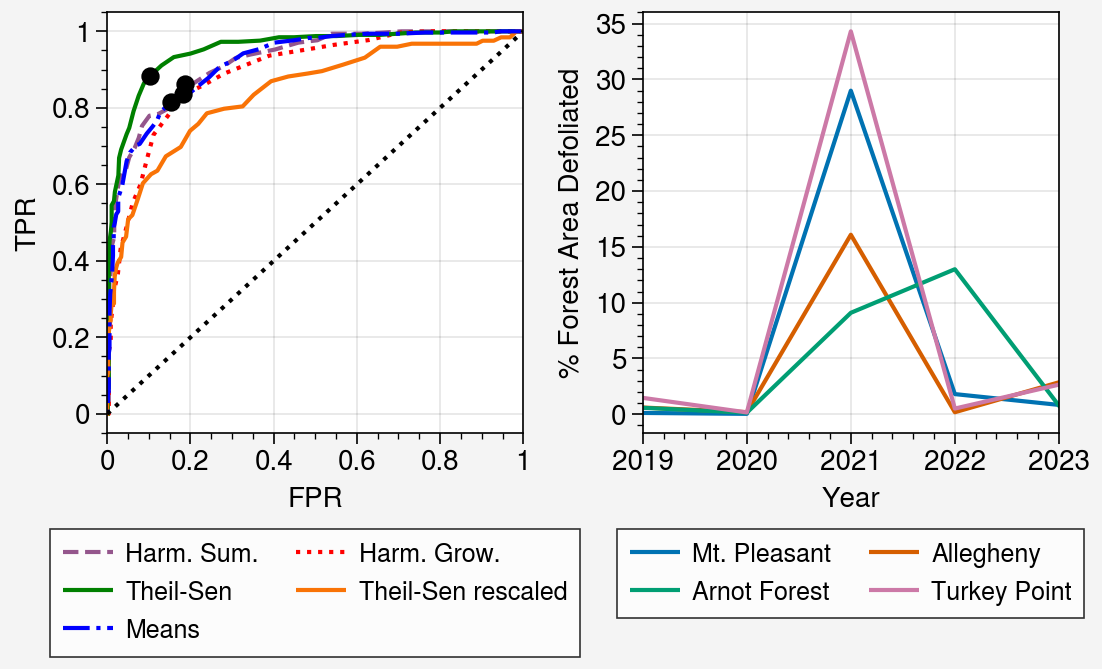

In [52]:
fig, axes = uplt.subplots(ncols=2, figsize=('140mm', '85mm'), share=False, fontsize=10)

# Harmonic All Year
#axes[0].plot(harmonic_all_year['FPR'], harmonic_all_year['TPR'], label='Harmonic All Year', color='orange', marker='o')

# Harmonic Summer
axes[0].plot(harmonic_summer['FPR'], harmonic_summer['TPR'], label='Harm. Sum.', color='purple', linestyle='--')

# Harmonic Growing Season
axes[0].plot(harmonic_gs['FPR'], harmonic_gs['TPR'], label='Harm. Grow.', color='red', linestyle=':')

# Theil-Sen
axes[0].plot(sentinel2_unscaled['FPR'], sentinel2_unscaled['TPR'], label='Theil-Sen', color='green')

# Theil-Sen Recalsed
axes[0].plot(sentinel2['FPR'], sentinel2['TPR'], label='Theil-Sen rescaled', color='orange', linestyle='solid')

# Means
axes[0].plot(means['FPR'], means['TPR'], label='Means', color='blue', linestyle='-.')

# Optimal Points
TPRs = []
FPRs = []
for method in [harmonic_gs, harmonic_summer, sentinel2_unscaled, means]:
    index = np.argmin(np.sqrt((1 - method['TPR'])**2 + method['FPR']**2))
    TPRs.append(method['TPR'][index])
    FPRs.append(method['FPR'][index])
axes[0].scatter(FPRs, TPRs, c='black', zorder=10)

axes[0].plot([0, 1], [0, 1], color='black', linestyle='dotted')
axes[0].format(xlim=[0, 1], xlabel='FPR', ylabel='TPR')
#ax.legend([m1, m2, m3, m4, m5, m6], ncols=1, loc='r')
uplt.rc['legend.fontsize'] = 9
axes[0].legend(loc='b', ncols=2)

# Second plot
for site, name in zip(['mt_pleasant', 'allegheny', 'arnot_forest', 'turkey_point'], ['Mt. Pleasant', 'Allegheny', 'Arnot Forest', 'Turkey Point']):
    data = study_regions[study_regions['site_name'] == site].reset_index()
    axes[1].plot(data['year'], 100*data['defol']/data['forest'], label=name)
axes[1].format(ylabel='% Forest Area Defoliated', xlabel='Year')

axes[1].legend(loc='b', ncols=2)

fig.savefig('./Figures/ROC/ROC_cross_method_comparison.png')

## Cross data-source comparison

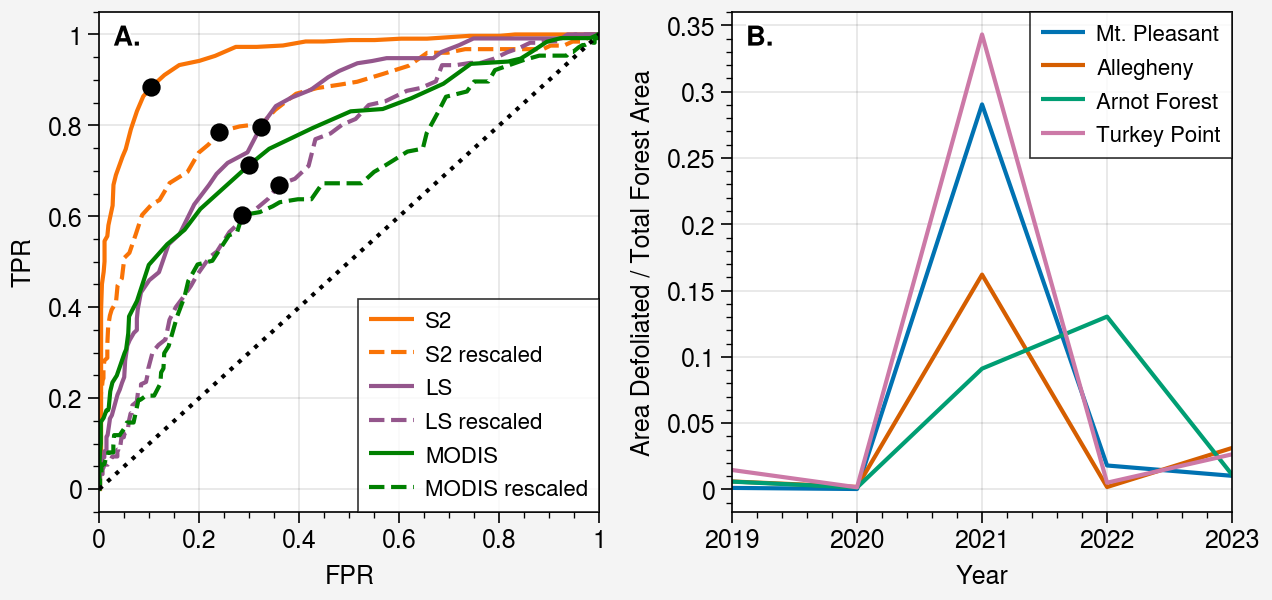

In [11]:
fig, axes = uplt.subplots(ncols=2, share=False)

axes.format(abc='A.', abcloc='ul')

# Sentinel-2 unscaled
axes[0].plot(sentinel2_unscaled['FPR'], sentinel2_unscaled['TPR'], label='S2', color='orange')

# Sentinel-2
axes[0].plot(sentinel2['FPR'], sentinel2['TPR'], label='S2 rescaled', color='orange', linestyle='dashed')

# Landsat unscaled
axes[0].plot(landsat_unscaled['FPR'], landsat_unscaled['TPR'], label='LS', color='purple')

# Landsat
axes[0].plot(landsat['FPR'], landsat['TPR'], label='LS rescaled', color='purple', linestyle='dashed')

# MODIS unscaled
axes[0].plot(modis_unscaled['FPR'], modis_unscaled['TPR'], label='MODIS', color='green')

# MODIS
axes[0].plot(modis['FPR'], modis['TPR'], label='MODIS rescaled', color='green', linestyle='dashed')

# Optimal Points
TPRs = []
FPRs = []
for method in [sentinel2_unscaled, sentinel2, landsat_unscaled, landsat, modis_unscaled, modis]:
    index = np.argmin(np.sqrt((1 - method['TPR'])**2 + method['FPR']**2))
    TPRs.append(method['TPR'][index])
    FPRs.append(method['FPR'][index])
axes[0].scatter(FPRs, TPRs, c='black', zorder=10)

axes[0].plot([0, 1], [0, 1], color='black', linestyle='dotted')
axes[0].format(xlim=[0, 1])
#ax.legend([m1, m2, m3, m4, m5, m6], ncols=1, loc='r')
uplt.rc['legend.fontsize'] = 8
axes[0].legend(loc='lr', ncols=1)


## Second plot
for site, name in zip(['mt_pleasant', 'allegheny', 'arnot_forest', 'turkey_point'], ['Mt. Pleasant', 'Allegheny', 'Arnot Forest', 'Turkey Point']):
    data = study_regions[study_regions['site_name'] == site].reset_index()
    axes[1].plot(data['year'], data['defol']/data['forest'], label=name)
axes[1].format(ylabel='Area Defoliated / Total Forest Area', xlabel='Year')
axes[1].legend(loc='ur', ncols=1)
fig.savefig('./Figures/ROC/ROC_cross_site_comparison_V2.png')

## Site level comparison

In [68]:
def add_ROC_plot(ax, curves, colors, styles, title):
    for i, curve in enumerate(curves):
        ax.plot(curve['FPR'], curve['TPR'], label='', color=colors[i], linestyle=styles[i], zorder=0)
    
    ax.plot([0, 1], [0, 1], color='black', linestyle='dotted')
    ax.format(xlim=[0, 1], title=title)

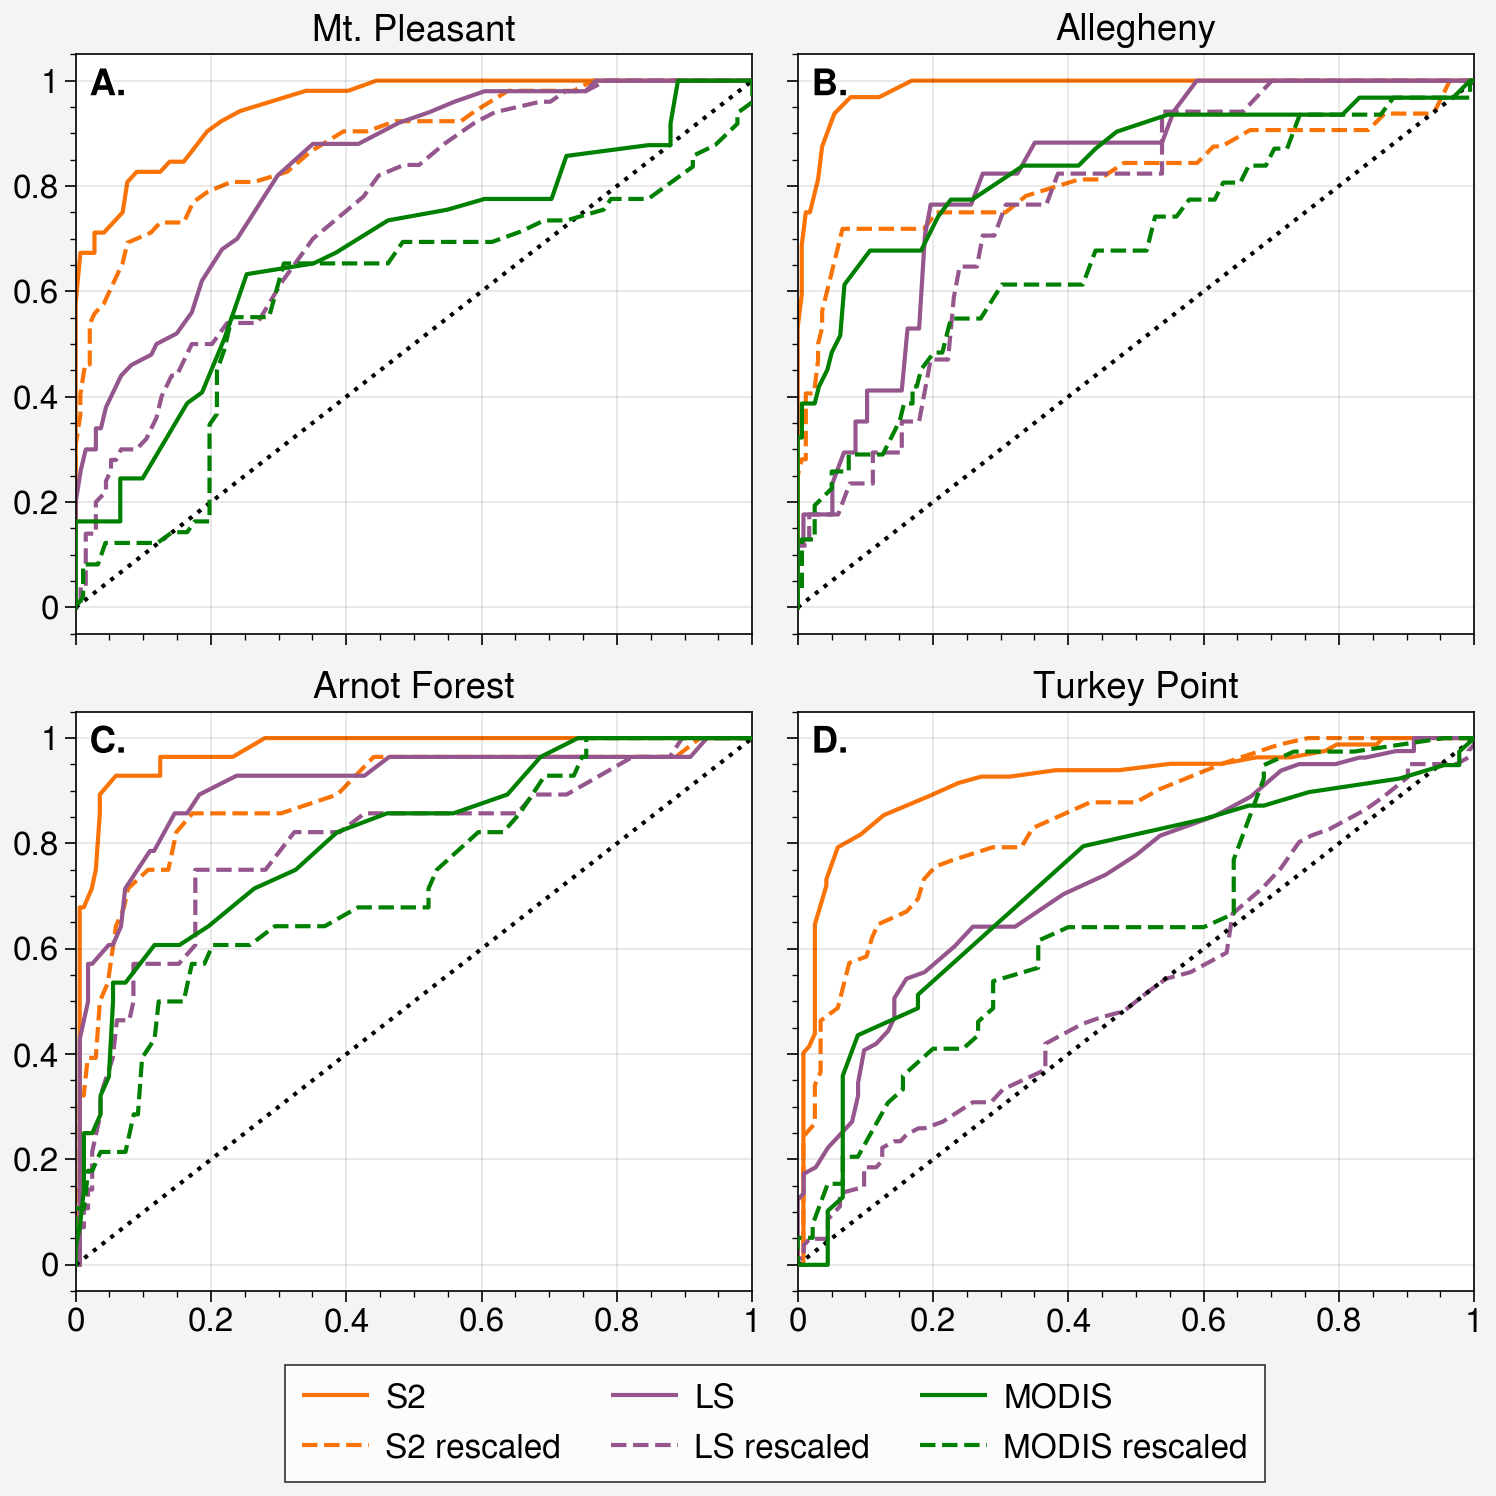

In [13]:
fig, axes = uplt.subplots(ncols=2, nrows=2, figsize=('190mm', '190mm'), fontsize=12)

axes.format(abc='A.', abcloc='ul')

# Mt. Pleasant
add_ROC_plot(axes[0], mtp_s2_unscaled, mtp_s2, mtp_ls_unscaled, mtp_ls, mtp_modis_unscaled, mtp_modis, 'Mt. Pleasant')

# Allegheny
add_ROC_plot(axes[1], alle_s2_unscaled, alle_s2, alle_ls_unscaled, alle_ls, alle_modis_unscaled, alle_modis, 'Allegheny')

# Arnot Forest
#add_ROC_plot(axes[2], af_s2_unscaled, af_s2, af_ls_unscaled, af_ls, af_modis_unscaled, af_modis, 'Arnot Forest')

# Turkey Point
#add_ROC_plot(axes[3], tp_s2_unscaled, tp_s2, tp_ls_unscaled, tp_ls, tp_modis_unscaled, tp_modis, 'Turkey Point')

# Create legend
axes[0].plot([],[], label='S2', color='orange')
axes[0].plot([],[], label='LS', color='purple')
axes[0].plot([],[], label='MODIS', color='green')
axes[0].plot([],[], label='S2 rescaled', color='orange', linestyle='dashed')
axes[0].plot([],[], label='LS rescaled', color='purple', linestyle='dashed')
axes[0].plot([],[], label='MODIS rescaled', color='green', linestyle='dashed')
uplt.rc['legend.fontsize'] = 12
fig.legend(loc='b', ncols=3)

fig.savefig('./Figures/ROC/All_Sites_Comparison_ROC.svg')

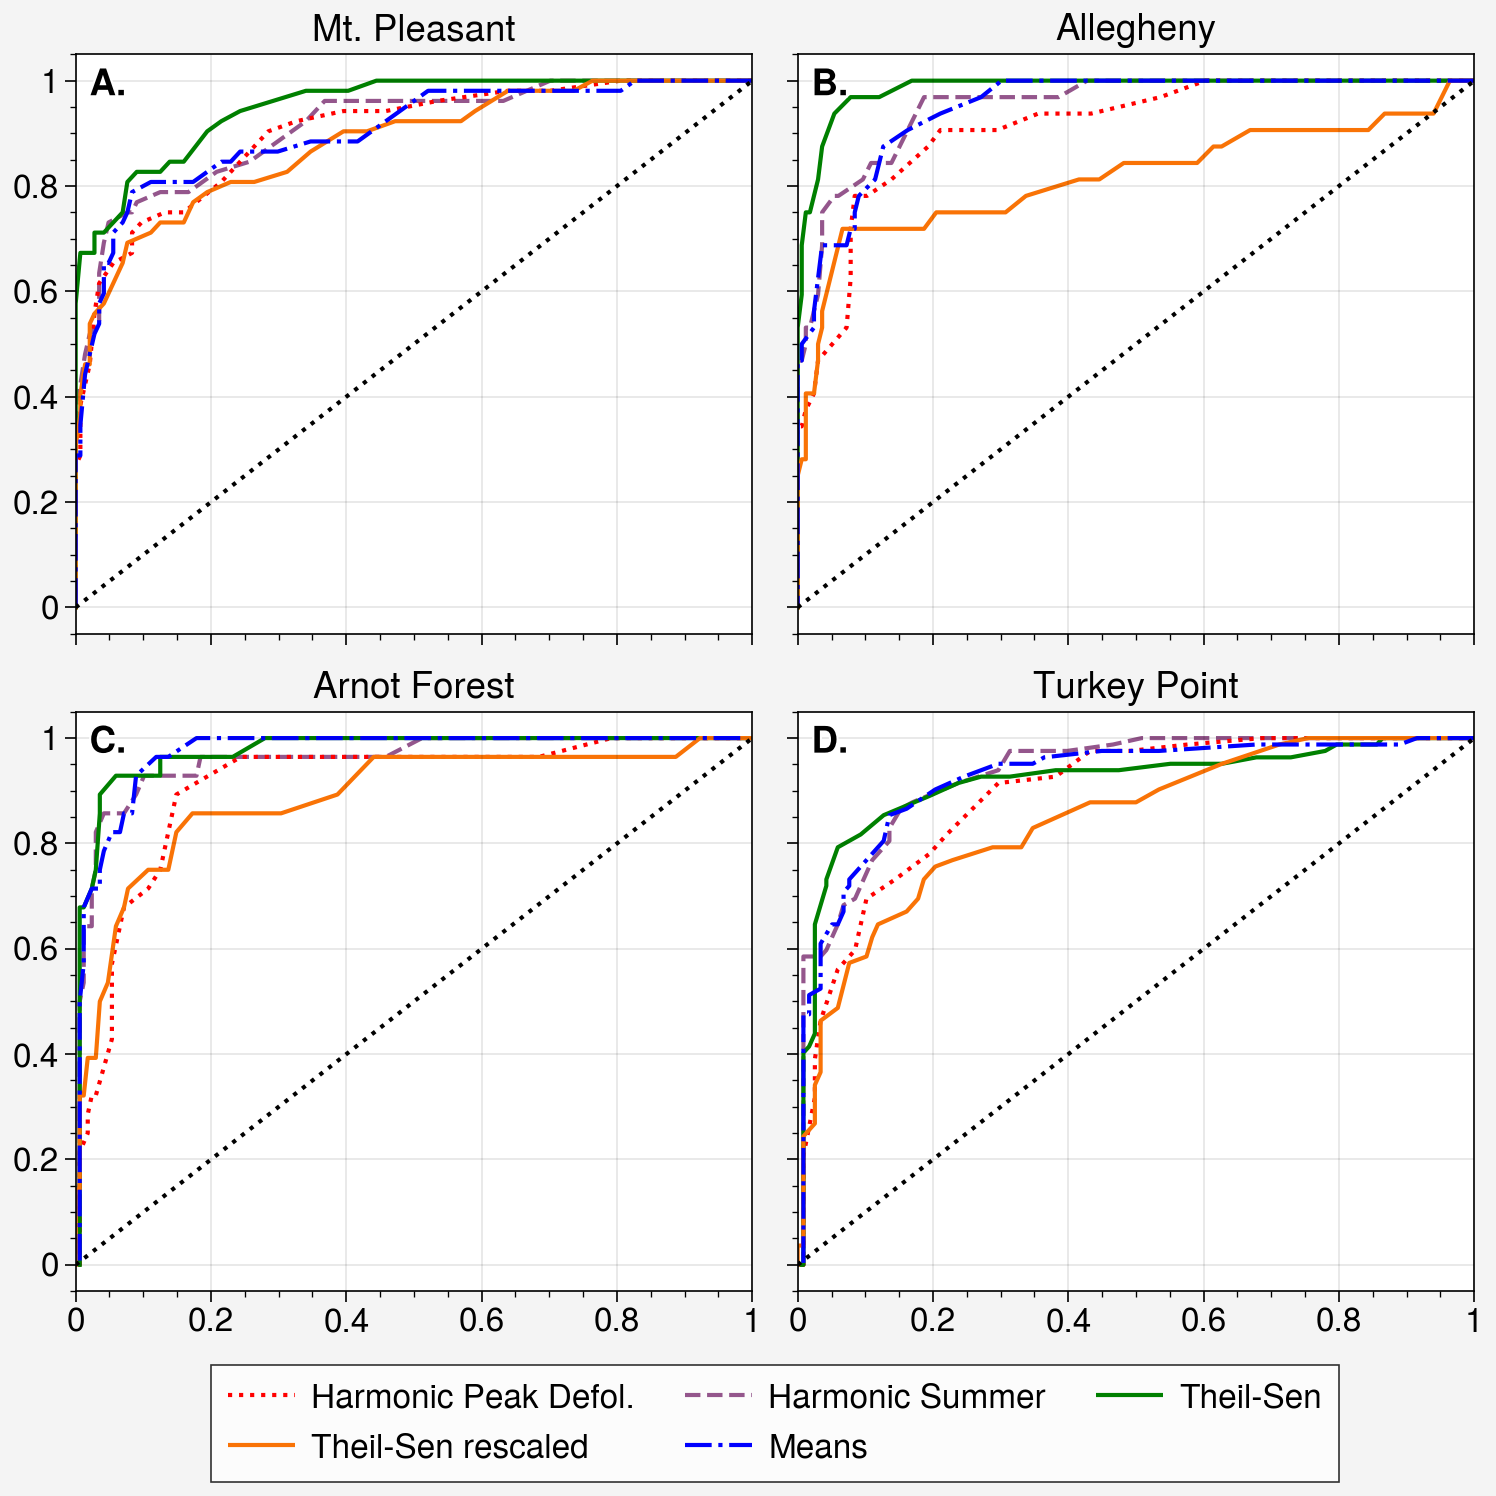

In [74]:
fig, axes = uplt.subplots(ncols=2, nrows=2, figsize=('190mm', '190mm'), fontsize=12)

axes.format(abc='A.', abcloc='ul')

# Mt. Pleasant
add_ROC_plot(axes[0], 
             [mtp_harmonic_summer, mtp_harmonic_gs, mtp_s2_unscaled, mtp_s2, mtp_means], 
             ['purple', 'red', 'green', 'orange', 'blue'], 
             ['--', ':', '-', '-', '-.'], 
             'Mt. Pleasant')

# Allegheny
add_ROC_plot(axes[1], 
             [alle_harmonic_summer, alle_harmonic_gs, alle_s2_unscaled, alle_s2, alle_means], 
             ['purple', 'red', 'green', 'orange', 'blue'], 
             ['--', ':', '-', '-', '-.'], 
             'Allegheny')

# Arnot Forest
add_ROC_plot(axes[2], 
             [af_harmonic_summer, af_harmonic_gs, af_s2_unscaled, af_s2, af_means], 
             ['purple', 'red', 'green', 'orange', 'blue'], 
             ['--', ':', '-', '-', '-.'], 
             'Arnot Forest')

# Turkey Point
add_ROC_plot(axes[3], 
             [tp_harmonic_summer, tp_harmonic_gs, tp_s2_unscaled, tp_s2, tp_means], 
             ['purple', 'red', 'green', 'orange', 'blue'], 
             ['--', ':', '-', '-', '-.'], 
             'Turkey Point')

# Create legend
axes[0].plot([],[], label='Harmonic Peak Defol.', color='red', linestyle=':')
axes[0].plot([],[], label='Harmonic Summer', color='purple', linestyle='--')
axes[0].plot([],[], label='Theil-Sen', color='green', linestyle='-')
axes[0].plot([],[], label='Theil-Sen rescaled', color='orange', linestyle='-')
axes[0].plot([],[], label='Means', color='blue', linestyle='-.')
uplt.rc['legend.fontsize'] = 12
fig.legend(loc='b', ncols=3)

fig.savefig('./Figures/ROC/All_Methods_Comparison_ROC.svg')

# Performance Table Builder

In [54]:
def build_table(sets, names):
    AUCs = []
    for s in sets:
        FPR = s['FPR'].values
        TPR = s['TPR'].values

        FPR_dif = FPR[1:] - FPR[:-1]
        TPR_dif = (TPR[1:] + TPR[:-1])/2
        AUCs.append(np.sum(TPR_dif*FPR_dif)*-1)

    thresholds = []
    OAs = []
    Pos_PAs = []
    Pos_UAs = []
    Neg_PAs = []
    Neg_UAs = []
    F1_scores = []

    for s in sets:
        opt_thresh = s['threshold'].values[np.argmin(np.sqrt((1 - s['TPR'])**2 + s['FPR']**2))]
        thresholds.append(opt_thresh)

        mask = s['threshold'] == opt_thresh
        OAs.append(s.loc[mask, 'OA'].values[0])
        Pos_PAs.append(s.loc[mask, 'TPR'].values[0])
        Pos_UAs.append(s.loc[mask, 'Pos_UA'].values[0])
        Neg_PAs.append(1 - s.loc[mask, 'FPR'].values[0])
        Neg_UAs.append(s.loc[mask, 'Neg_UA'].values[0])
        F1_scores.append(2*(Pos_PAs[-1]*Pos_UAs[-1])/(Pos_PAs[-1] + Pos_UAs[-1]))

    results = pd.DataFrame(index=names,
                           data={'AUC': AUCs,
                                 'threshold': thresholds,
                                 'OA':OAs,
                                 'Pos_PA': Pos_PAs,
                                 'Neg_PA': Neg_PAs,
                                 'Pos_UA': Pos_UAs,
                                 'Neg_UA': Neg_UAs,
                                 'Pos_F1': F1_scores})

    return results

In [55]:
pd.options.display.float_format = "{:,.3f}".format

## Cross-method comparison

In [62]:
build_table([sentinel2_unscaled, sentinel2, harmonic_summer, harmonic_gs, means], ['Theil-Sen', 'Theil-Sen Rescaled','Harmonic Summer', 'Harmonic Peak Defol.', 'Means'])

,AUC,threshold,OA,Pos_PA,Neg_PA,Pos_UA,Neg_UA,Pos_F1
Theil-Sen,0.952,-0.040,0.890,0.884,0.896,0.745,0.950,0.809
Theil-Sen Rescaled,0.841,-0.010,0.773,0.786,0.761,0.539,0.917,0.640
Harmonic Summer,0.922,-0.020,0.813,0.862,0.813,0.601,0.936,0.708
Harmonic Peak Defol.,0.894,-0.035,0.811,0.835,0.817,0.590,0.927,0.691
Means,0.914,-0.075,0.827,0.814,0.848,0.633,0.919,0.712


In [63]:
build_table([alle_s2_unscaled, alle_s2, alle_harmonic_summer, alle_harmonic_gs, alle_means], ['Theil-Sen', 'Theil-Sen Rescaled','Harmonic Summer', 'Harmonic Peak Defol.', 'Means'])

,AUC,threshold,OA,Pos_PA,Neg_PA,Pos_UA,Neg_UA,Pos_F1
Theil-Sen,0.986,-0.035,0.944,0.938,0.946,0.769,0.987,0.845
Theil-Sen Rescaled,0.818,-0.040,0.899,0.719,0.934,0.676,0.945,0.697
Harmonic Summer,0.952,-0.005,0.848,0.906,0.837,0.518,0.979,0.659
Harmonic Peak Defol.,0.911,-0.025,0.818,0.875,0.807,0.467,0.971,0.609
Means,0.950,-0.045,0.874,0.875,0.873,0.571,0.973,0.691


In [64]:
build_table([mtp_s2_unscaled, mtp_s2, mtp_harmonic_summer, mtp_harmonic_gs, mtp_means], ['Theil-Sen', 'Theil-Sen Rescaled','Harmonic Summer', 'Harmonic Peak Defol.', 'Means'])

,AUC,threshold,OA,Pos_PA,Neg_PA,Pos_UA,Neg_UA,Pos_F1
Theil-Sen,0.950,-0.070,0.888,0.827,0.910,0.768,0.936,0.796
Theil-Sen Rescaled,0.881,-0.045,0.801,0.788,0.806,0.594,0.913,0.678
Harmonic Summer,0.912,-0.055,0.852,0.788,0.875,0.695,0.920,0.739
Harmonic Peak Defol.,0.901,-0.050,0.837,0.750,0.868,0.672,0.906,0.709
Means,0.902,-0.110,0.867,0.808,0.889,0.724,0.928,0.764


In [65]:
build_table([af_s2_unscaled, af_s2, af_harmonic_summer, af_harmonic_gs, af_means], ['Theil-Sen', 'Theil-Sen Rescaled','Harmonic Summer', 'Harmonic Peak Defol.', 'Means'])

,AUC,threshold,OA,Pos_PA,Neg_PA,Pos_UA,Neg_UA,Pos_F1
Theil-Sen,0.974,-0.045,0.939,0.929,0.940,0.722,0.988,0.813
Theil-Sen Rescaled,0.889,0.010,0.832,0.857,0.827,0.453,0.972,0.593
Harmonic Summer,0.959,-0.055,0.903,0.929,0.899,0.605,0.987,0.732
Harmonic Peak Defol.,0.911,-0.045,0.857,0.893,0.851,0.500,0.979,0.641
Means,0.954,-0.095,0.913,0.929,0.911,0.634,0.987,0.754


In [66]:
build_table([tp_s2_unscaled, tp_s2, tp_harmonic_summer, tp_harmonic_gs, tp_means], ['Theil-Sen', 'Theil-Sen Rescaled','Harmonic Summer', 'Harmonic Peak Defol.', 'Means'])

,AUC,threshold,OA,Pos_PA,Neg_PA,Pos_UA,Neg_UA,Pos_F1
Theil-Sen,0.917,-0.030,0.865,0.854,0.873,0.824,0.896,0.838
Theil-Sen Rescaled,0.844,-0.010,0.780,0.756,0.797,0.721,0.825,0.738
Harmonic Summer,0.930,0.005,0.855,0.866,0.847,0.798,0.901,0.830
Harmonic Peak Defol.,0.892,-0.020,0.795,0.817,0.780,0.720,0.860,0.766
Means,0.923,-0.035,0.860,0.854,0.864,0.814,0.895,0.833


## Cross data-source comparison

In [65]:
build_table([sentinel2_unscaled, sentinel2, landsat_unscaled, landsat, modis_unscaled, modis], ['Sentinel-2', 'Sentinel-2 rescaled', 'Landsat 7/8', 'Landsat 7/8 rescaled', 'MODIS', 'MODIS rescaled'])

,AUC,threshold,OA,Pos_PA,Neg_PA,Pos_UA,Neg_UA,Pos_F1
Sentinel-2,0.952,-0.040,0.890,0.884,0.896,0.745,0.950,0.809
Sentinel-2 rescaled,0.841,-0.010,0.773,0.786,0.761,0.539,0.917,0.640
Landsat 7/8,0.811,-0.030,0.734,0.797,0.677,0.483,0.902,0.601
Landsat 7/8 rescaled,0.712,0.000,0.654,0.669,0.640,0.382,0.830,0.486
MODIS,0.767,-0.025,0.711,0.713,0.700,0.466,0.847,0.563
MODIS rescaled,0.659,-0.010,0.683,0.603,0.714,0.436,0.809,0.506


In [66]:
build_table([alle_s2_unscaled, alle_s2, alle_ls_unscaled, alle_ls, alle_modis_unscaled, alle_modis], ['Sentinel-2', 'Sentinel-2 rescaled', 'Landsat 7/8', 'Landsat 7/8 rescaled', 'MODIS', 'MODIS rescaled'])

,AUC,threshold,OA,Pos_PA,Neg_PA,Pos_UA,Neg_UA,Pos_F1
Sentinel-2,0.986,-0.035,0.944,0.938,0.946,0.769,0.987,0.845
Sentinel-2 rescaled,0.818,-0.040,0.899,0.719,0.934,0.676,0.945,0.697
Landsat 7/8,0.818,-0.045,0.799,0.765,0.803,0.361,0.959,0.491
Landsat 7/8 rescaled,0.758,-0.020,0.701,0.765,0.692,0.265,0.953,0.394
MODIS,0.840,-0.020,0.774,0.774,0.774,0.400,0.946,0.527
MODIS rescaled,0.677,-0.010,0.684,0.613,0.698,0.284,0.902,0.388


In [67]:
build_table([mtp_s2_unscaled, mtp_s2, mtp_ls_unscaled, mtp_ls, mtp_modis_unscaled, mtp_modis], ['Sentinel-2', 'Sentinel-2 rescaled', 'Landsat 7/8', 'Landsat 7/8 rescaled', 'MODIS', 'MODIS rescaled'])

,AUC,threshold,OA,Pos_PA,Neg_PA,Pos_UA,Neg_UA,Pos_F1
Sentinel-2,0.950,-0.070,0.888,0.827,0.910,0.768,0.936,0.796
Sentinel-2 rescaled,0.881,-0.045,0.801,0.788,0.806,0.594,0.913,0.678
Landsat 7/8,0.834,-0.025,0.734,0.820,0.701,0.506,0.913,0.626
Landsat 7/8 rescaled,0.751,-0.005,0.663,0.700,0.649,0.427,0.853,0.530
MODIS,0.678,-0.030,0.707,0.633,0.747,0.574,0.791,0.602
MODIS rescaled,0.592,-0.025,0.679,0.653,0.692,0.533,0.787,0.587


In [68]:
build_table([tp_s2_unscaled, tp_s2, tp_ls_unscaled, tp_ls, tp_modis_unscaled, tp_modis], ['Sentinel-2', 'Sentinel-2 rescaled', 'Landsat 7/8', 'Landsat 7/8 rescaled', 'MODIS', 'MODIS rescaled'])

,AUC,threshold,OA,Pos_PA,Neg_PA,Pos_UA,Neg_UA,Pos_F1
Sentinel-2,0.917,-0.030,0.865,0.854,0.873,0.824,0.896,0.838
Sentinel-2 rescaled,0.844,-0.010,0.780,0.756,0.797,0.721,0.825,0.738
Landsat 7/8,0.736,-0.065,0.699,0.642,0.741,0.642,0.741,0.642
Landsat 7/8 rescaled,0.529,-0.025,0.544,0.420,0.634,0.453,0.602,0.436
MODIS,0.721,-0.025,0.679,0.744,0.622,0.630,0.737,0.682
MODIS rescaled,0.650,0.005,0.631,0.615,0.644,0.600,0.659,0.608


In [70]:
build_table([af_s2_unscaled, af_s2, af_ls_unscaled, af_ls, af_modis_unscaled, af_modis], ['Sentinel-2', 'Sentinel-2 rescaled', 'Landsat 7/8', 'Landsat 7/8 rescaled', 'MODIS', 'MODIS rescaled'])

,AUC,threshold,OA,Pos_PA,Neg_PA,Pos_UA,Neg_UA,Pos_F1
Sentinel-2,0.974,-0.045,0.939,0.929,0.940,0.722,0.988,0.813
Sentinel-2 rescaled,0.889,0.010,0.832,0.857,0.827,0.453,0.972,0.593
Landsat 7/8,0.908,-0.015,0.854,0.857,0.854,0.500,0.972,0.632
Landsat 7/8 rescaled,0.799,0.015,0.812,0.750,0.823,0.420,0.951,0.538
MODIS,0.810,-0.025,0.733,0.714,0.736,0.317,0.938,0.440
MODIS rescaled,0.724,-0.010,0.770,0.607,0.798,0.340,0.922,0.436
